In [144]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
from scipy.signal import butter, lfilter, freqz, kaiserord, firwin
import librosa, librosa.display

## Load the file

Download and load `Pixies-Debaser-12seconds.wav`

In [145]:
debaser_short, sr = librosa.load("Pixies-Debaser-12seconds.wav")

In [146]:
ipd.Audio(debaser_short, rate=sr)

## Plot the spectogram

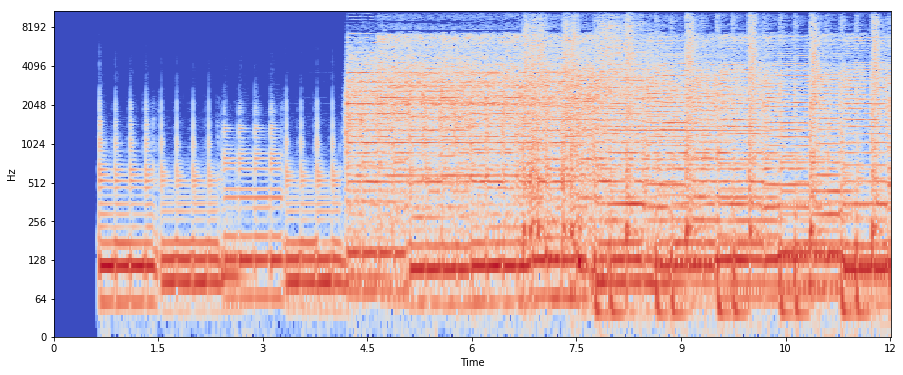

In [147]:
hop_length = 512
n_fft = 2048
debaser_12_stft = librosa.stft(debaser_short, n_fft=n_fft, hop_length=hop_length)

S = librosa.amplitude_to_db(abs(debaser_12_stft))

plt.figure(figsize=(15, 6))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')

## Perform onset detection and plot the results

In [93]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(debaser_short, sr=sr, hop_length=hop_length, backtrack=True)
onset_frames # frame numbers of estimated onsets

array([ 27,  34,  44,  57,  65,  74,  83,  91, 104, 112, 123, 131, 143,
       153, 160, 160, 170, 177, 314, 354, 388, 408, 429, 448, 458, 467,
       486, 494, 500, 513])

In [94]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
onset_times

array([ 0.62693878,  0.78947846,  1.021678  ,  1.32353741,  1.50929705,
        1.71827664,  1.92725624,  2.11301587,  2.41487528,  2.60063492,
        2.85605442,  3.04181406,  3.32045351,  3.55265306,  3.71519274,
        3.71519274,  3.94739229,  4.10993197,  7.29106576,  8.21986395,
        9.0093424 ,  9.4737415 ,  9.96136054, 10.40253968, 10.63473923,
       10.84371882, 11.28489796, 11.4706576 , 11.60997732, 11.91183673])

In [95]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
onset_samples

array([ 13824,  17408,  22528,  29184,  33280,  37888,  42496,  46592,
        53248,  57344,  62976,  67072,  73216,  78336,  81920,  81920,
        87040,  90624, 160768, 181248, 198656, 208896, 219648, 229376,
       234496, 239104, 248832, 252928, 256000, 262656])

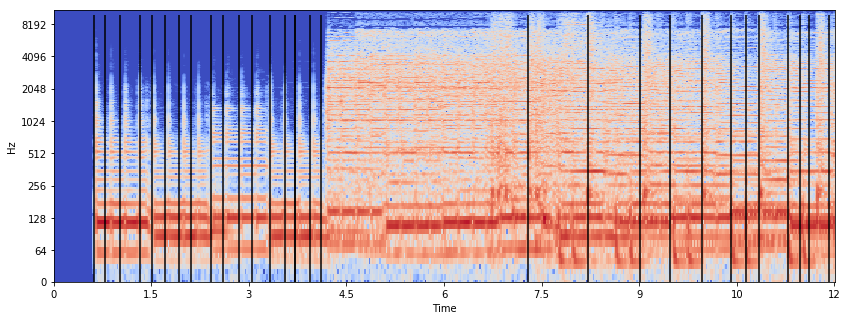

In [148]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

## Determine the base intro and shorten the sequence

The song opens with a bass guitar riff.  Use the last plot to determine the location of this intro and shorten the sequence to just this intro

In [103]:
onset_samples[0], onset_samples[17]

(13824, 90624)

In [104]:
debaser_intro = debaser_short[onset_samples[0]:onset_samples[17]]
ipd.Audio(debaser_intro, rate = sr)

In [149]:
len(debaser_short)

264600

## Perform `fft`, make frequency plots and determine the frequency with amximum amplitude in each segment

Note that you can use `argmax` method to locate the index of the largest magnitude.  Be sure to focus only on the positive frequencies.

In [124]:
def fft_plot(seq, lower = 0, upper = 22050, sr = 22050, ax = None):
    X = np.fft.fft(seq)
    X_mag = numpy.absolute(X)
    n = seq.size
    timestep = 1/sr
    f = np.fft.fftfreq(n, d=timestep)
    filt = np.logical_and(f >= lower, f < upper)
    if ax is None:
        out = plt.figure(figsize=(13, 5))
        plt.xlabel('Frequency (Hz)')
        plt.plot(f[filt], X_mag[filt], lw = 0.5)
    else:
        out = ax.plot(f[filt], X_mag[filt], lw = 0.5)
    return out, f, X_mag

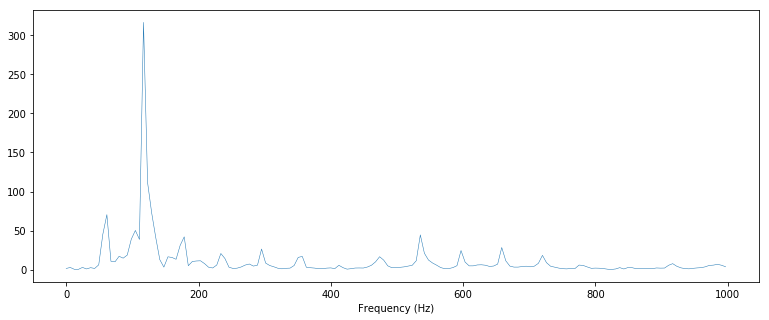

In [125]:
i = 0
l, u = onset_samples[i], onset_samples[i + 1] 
seq = debaser_short[l:u]
_, fs, mags = fft_plot(seq, upper= 1000)

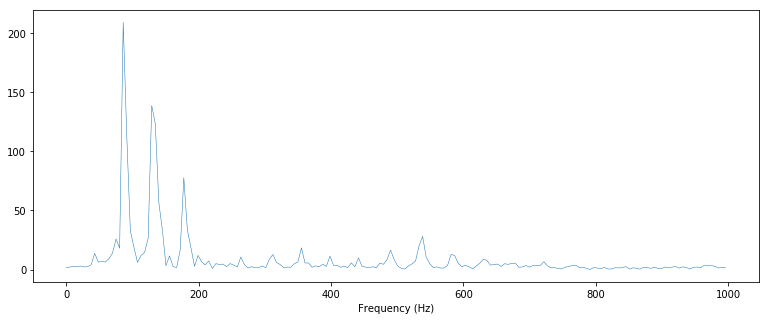

In [133]:
i = 6
l, u = onset_samples[i], onset_samples[i + 1] 
seq = debaser_short[l:u]
_, fs, mags = fft_plot(seq, upper= 1000)

In [134]:
fs[mags.argmax()]

86.1328125

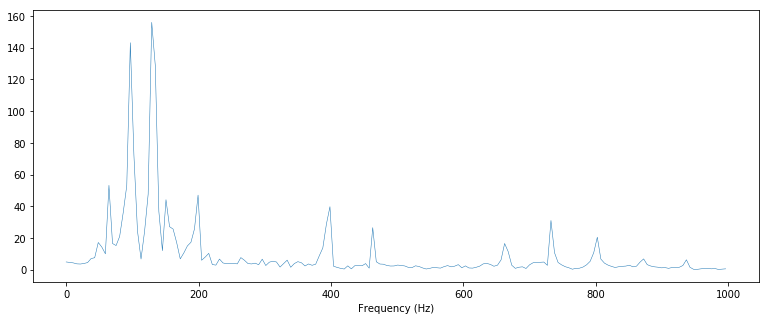

In [137]:
i = 8
l, u = onset_samples[i], onset_samples[i + 1] 
seq = debaser_short[l:u]
_, fs, mags = fft_plot(seq, upper= 1000)

In [138]:
fs[mags.argmax()]

129.19921875

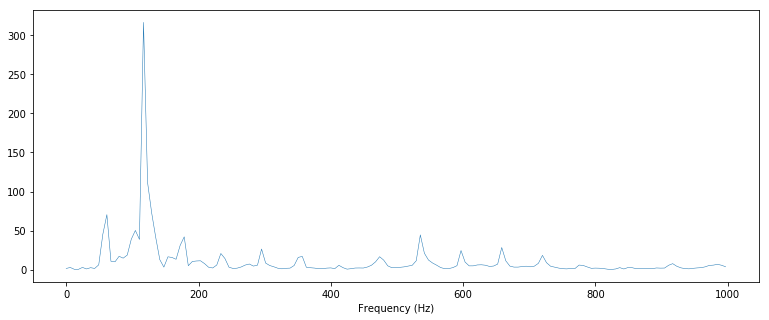

In [125]:
i = 0
l, u = onset_samples[i], onset_samples[i + 1] 
seq = debaser_short[l:u]
_, fs, mags = fft_plot(seq, upper= 1000)

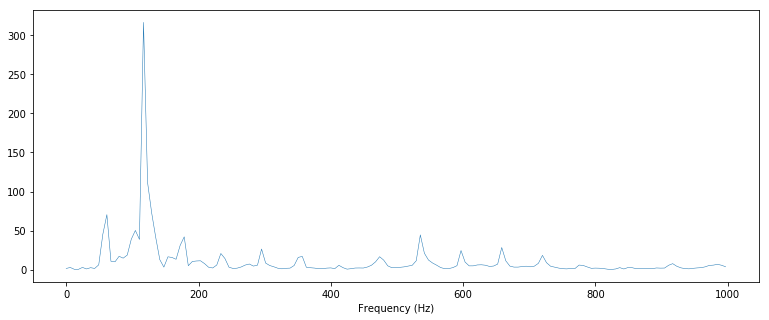

In [125]:
i = 0
l, u = onset_samples[i], onset_samples[i + 1] 
seq = debaser_short[l:u]
_, fs, mags = fft_plot(seq, upper= 1000)

In [122]:
fs[mags.argmax()]

116.89453125

In [123]:
for i, ind in enumerate(onset_samples):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-123-c16f41fc4f2b>, line 2)

116.89453125
120.5859375
115.94801682692307
118.4326171875
133.984375
133.984375
86.1328125
89.44561298076923
129.19921875
129.19921875
129.19921875
129.19921875
133.505859375
86.1328125


ValueError: Invalid number of FFT data points (0) specified.

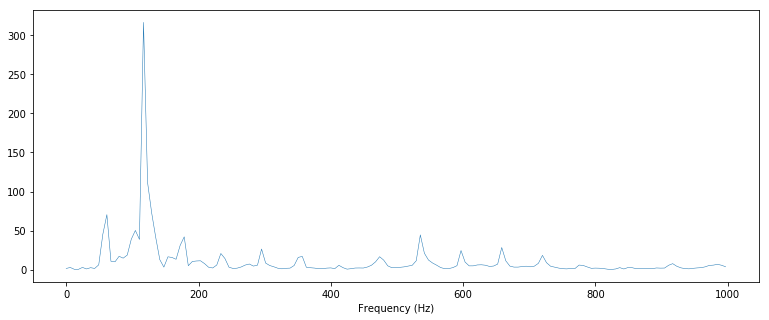

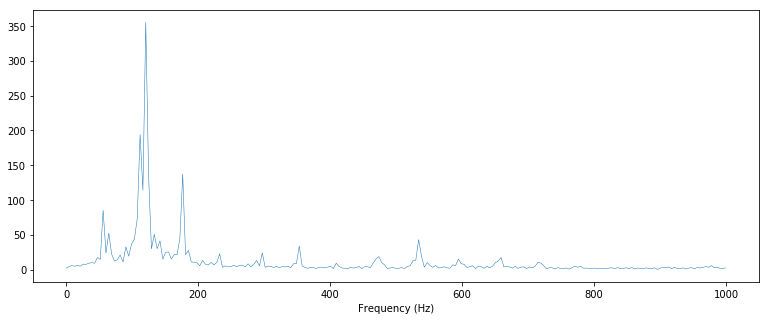

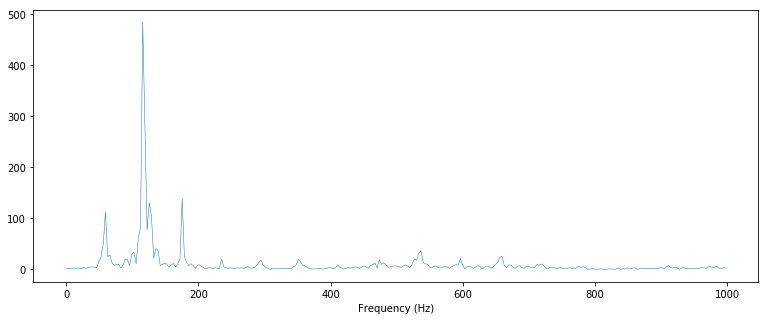

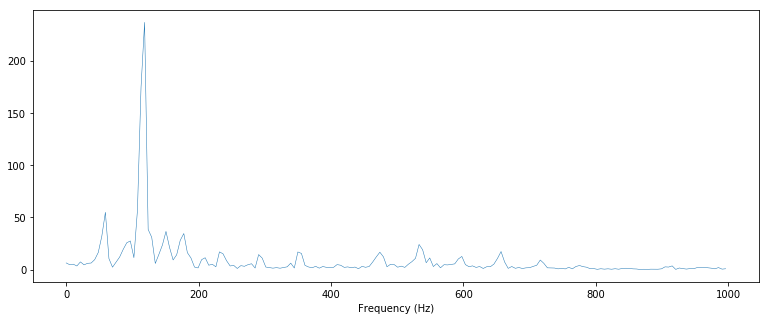

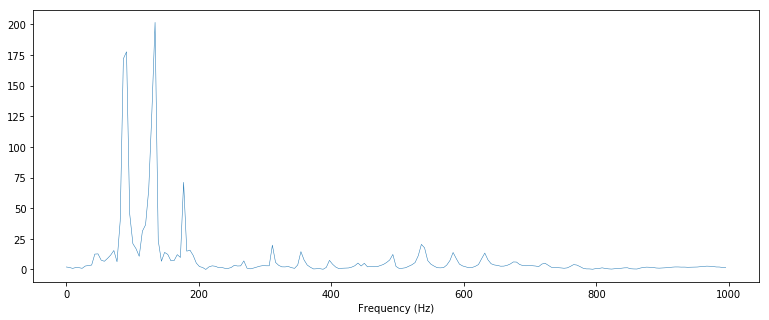

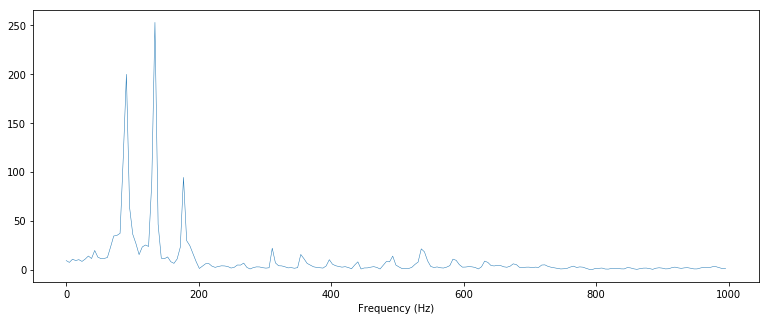

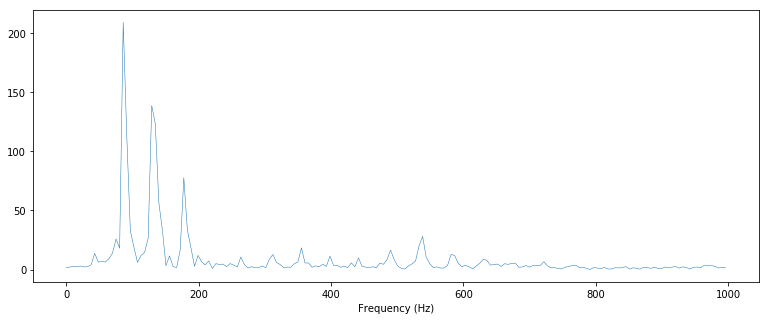

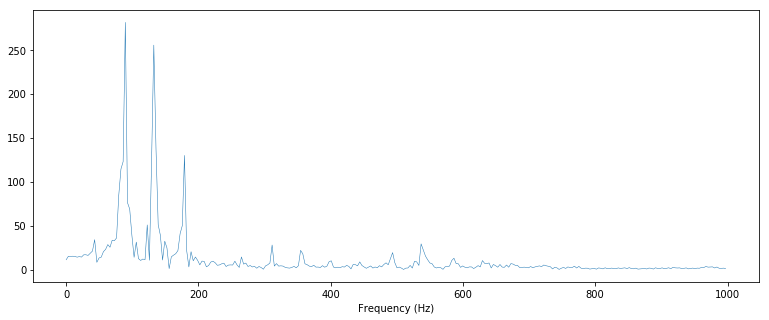

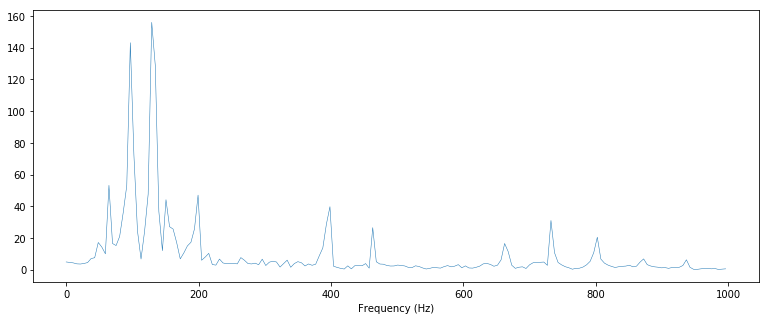

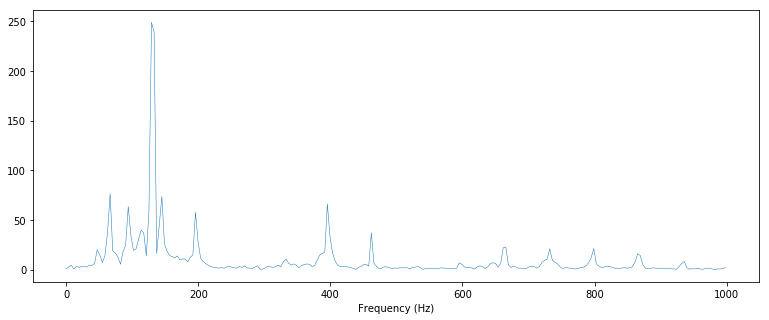

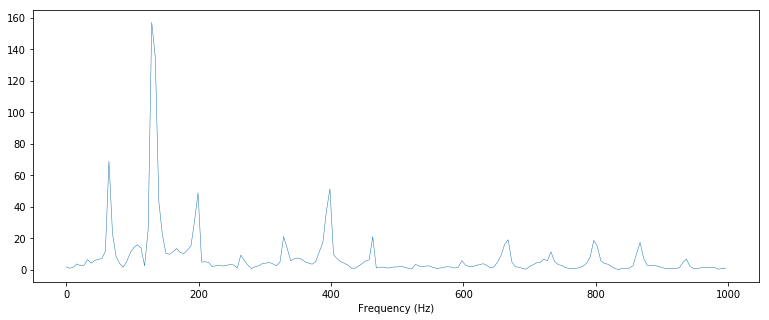

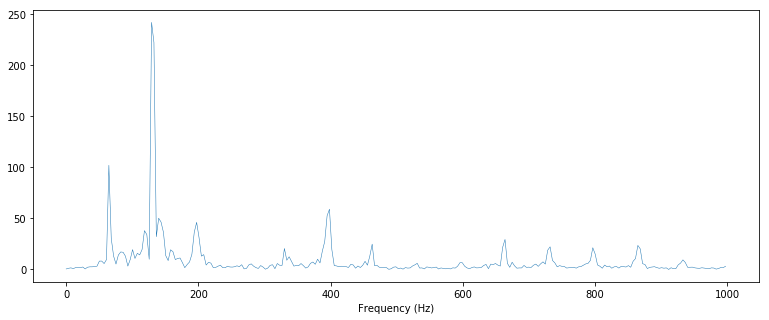

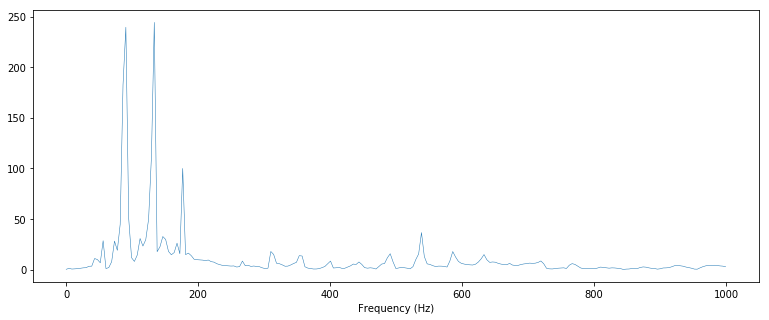

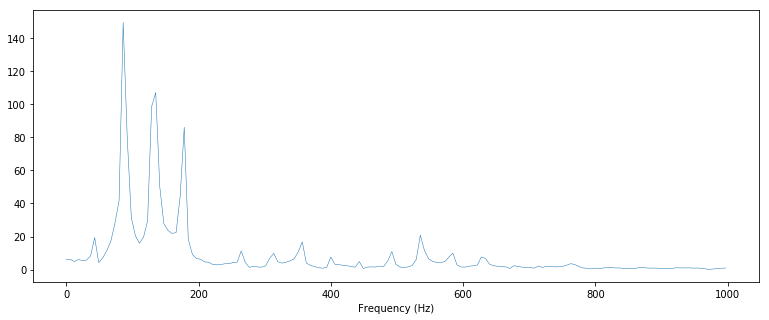

In [143]:
num_plots, lower, upper = 18, 0, 1000
for i, ax in enumerate(axs):
    l, u = onset_samples[i], onset_samples[i + 1] 
    seq = debaser_short[l:u]
    _, fs, mags = fft_plot(seq, upper= 1000)
    print(fs[mags[:len(mags)//2].argmax()])